# Scientific Computing Libraries

Some essential scientific computing libraries in python are 
- [NumPy](https://numpy.org/): Numerical Python
- [SciPy](https://www.scipy.org/): Scientific Python
- [Matplotlib](https://matplotlib.org/): Plotting library
- [Seaborn](https://seaborn.pydata.org/): Statistical data visualization
- [Pandas](https://pandas.pydata.org/): Data analysis library
- [SymPy](https://www.sympy.org/en/index.html): Symbolic Python

You saw some of these utilized in the previous lecture, but in this lecture we'll introduce them a little more thoroughly.

# NumPy

Numpy is the fundamental package for scientific computing in Python. It provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

In [22]:
import numpy as np

## Numpy Essentials

To get used to some of the operators, we'll create some random arrays. Functions that do this in numpy include `np.random.rand` and `np.random.randn`. The first creates an array of random numbers between 0 and 1, while the second creates an array of random numbers from a standard normal distribution.

If you want to create an array of random integers, you can use `np.random.randint`. We'll use this for now to keep our math simpler.

In [23]:
np.random.randint(0, 10, size=5)

array([8, 7, 5, 2, 2])

In [24]:
a, b = np.random.randint(0, 10, size=2), np.random.randint(0, 10, size=1)
print(a, b)

[6 7] [6]


Let's do some basic operations

In [25]:
print(a+b)
print(a-b)
print(a*b)
print(a/b)

[12 13]
[0 1]
[36 42]
[1.         1.16666667]


In [26]:
a = [1,2,3]
b = [4,5,6]

In [27]:
a * 4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [28]:
class trop(int):
    def __init__(self, x):
        super().__init__()
        self.x = x
    def __add__(self, y):
        return self.x * y
    # def __mul__(self, y):
    #     return max(self.x, y)
    def whatisthat(self):
        print("It's tropical")

TypeError: int() takes at most 2 arguments (3 given)

In [29]:
a = trop(5)
b = trop(7)
c = int(6)
a * b

TypeError: 'int' object is not callable

In [30]:
a.whatisthat()

It's tropical


In [31]:
old_int = int
int = 5
b = int(7)

TypeError: 'int' object is not callable

In [32]:
int = old_int

Note: it wasn't obvious, a priori, what to expect for division and multiplication, since these are vectors. However, we see that it does element-wise multiplication and division.

This isn't something we normally do in standard linear algebra, so let's so some of that with some 2x2 matrices.

In [33]:
a, b = np.random.randint(0, 10, size=(2,2)), np.random.randint(0, 10, size=(2,2))
print(a, "\n\n", b)

[[0 2]
 [0 0]] 

 [[7 2]
 [5 4]]


We can always see the shape of an array with the `shape` attribute.

In [34]:
a.shape

(2, 2)

Let's multiply

In [35]:
a @ b

array([[10,  8],
       [ 0,  0]])

In [36]:
np.matmul(a, b)

array([[10,  8],
       [ 0,  0]])

In [37]:
import numpy as np
print(dir(np.array))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__text_signature__']


In [38]:
a @ np.linalg.inv(a)

LinAlgError: Singular matrix

## Numpy Linear Algebra

Ok, so we see the NumPy can do some linear algebra. What about some other operations?

Some of the most essential operations in `np.linalg` are:
- `np.linalg.inv`: Inverse of a matrix
- `np.linalg.det`: Determinant of a matrix
- `np.linalg.eig`: Eigenvalues and eigenvectors of a matrix
- `np.linalg.solve`: Solve a linear system of equations

We saw the first, let's see the rest

In [39]:
a

array([[0, 2],
       [0, 0]])

In [40]:
np.linalg.det(a)

0.0

In [41]:
np.linalg.eig(a)

EigResult(eigenvalues=array([0., 0.]), eigenvectors=array([[ 1.00000000e+000, -1.00000000e+000],
       [ 0.00000000e+000,  1.00208418e-292]]))

In [42]:
# check the eigenvectors
eigvals, eigvecs = np.linalg.eig(a)
for i in range(len(eigvals)):
    print("Left:", np.dot(a, eigvecs[:,i]))
    print("Right:", eigvals[i]*eigvecs[:,i])

Left: [0. 0.]
Right: [0. 0.]
Left: [2.00416836e-292 0.00000000e+000]
Right: [-0.  0.]


In this syntax `eigvecs[:,i]` means "all rows, column i". This is a common syntax in python, and is called "slicing". We'll see it again later.

In the context of this eigenvalue problem, if we're not careful we can do the wrong thing, because eigvecs is a matrix and we need to be careful whether the rows or columns are the eigenvectors. Let's see what happens if we do the wrong thing.

In [43]:
# check the eigenvectors
eigvals, eigvecs = np.linalg.eig(a)
for i in range(len(eigvals)):
    print("Left:", np.dot(a, eigvecs[i]))
    print("Right:", eigvals[i]*eigvecs[i])

Left: [-2.  0.]
Right: [ 0. -0.]
Left: [2.00416836e-292 0.00000000e+000]
Right: [0. 0.]


We see these clearly don't match.

So: just be careful. Simple tests can always help you sort things out

In [44]:
eigvecs

array([[ 1.00000000e+000, -1.00000000e+000],
       [ 0.00000000e+000,  1.00208418e-292]])

In [45]:
eigvecs[0]

array([ 1., -1.])

In [46]:
eigvecs[:,0]

array([1., 0.])

## Numpy Statistics

Some of the essential statistical tools in numpy are in `np.random` and `np.linalg`. We'll see some of these in action. Some of the most essential functions are:
- `np.random.rand`: Uniform random numbers in [0,1]
- `np.random.randn`: Standard normal random numbers
- `np.random.randint`: Random integers
- `np.random.choice`: Random choice from an array
- `np.random.shuffle`: Randomly shuffle an array
- `np.random.seed`: Set the random seed
- `np.mean`: Mean of an array
- `np.std`: Standard deviation of an array
- `np.var`: Variance of an array, which is the square of the standard deviation
- `np.cov`: Covariance matrix of an array, which is a matrix of all pairwise covariances. The diagional part of the covariance matrix is the variance of each variable.

In [47]:
a = np.random.randint(1, 10, size= (3,3))
print(a)

[[7 7 5]
 [9 8 4]
 [8 4 8]]


In [48]:
np.random.shuffle(a)
print(a)

[[8 4 8]
 [9 8 4]
 [7 7 5]]


Let's play with mean

In [49]:
np.mean(a)

6.666666666666667

That's the mean of the whole thing! What if we want the mean of each row?

In [50]:
np.mean(a, axis=1)

array([6.66666667, 7.        , 6.33333333])

And the mean of each column?

In [51]:
np.mean(a, axis=1)

array([6.66666667, 7.        , 6.33333333])

These shapes are the same, so be careful.

A lot of the other functions take an axis argument in a similar way.

Let's check out choice

In [52]:
a = np.array([1,2,3,4,5])
print(np.random.choice(a,5))
print(np.random.choice(a,5, replace=False))

[2 5 1 3 2]
[3 4 1 2 5]


## Numpy Code Lab

Let's do a simple example from quantum mechanics. The problem is perturbation theory,

$H = H_0 + \lambda H_1$

where $H$ is the Hamiltonian and $\lambda$ is a small parameter if perturbation theory is to work. If this is a good idea, it should work pretty well for *any* Hermitian $H_0$ and $H_1$. So we'll make them random Hermitian 3x3 matrices and see what happens.

In [53]:
H0 = np.random.normal(0, 1, size=(3,3))
H0 = H0 + H0.T # make symmetric
print(H0)

[[ 0.06863751 -0.37393934  0.05373774]
 [-0.37393934 -1.30286872 -0.99065994]
 [ 0.05373774 -0.99065994  0.78188188]]


In [54]:
H1 = np.random.normal(0, 1, size=(3,3))
H1 = H1 + H1.T # make symmetric
print(H1)

[[-0.46320525  0.6200912   3.67934964]
 [ 0.6200912   1.56624293  1.55747268]
 [ 3.67934964  1.55747268  0.16479807]]


In [55]:
lambdas =[10**-k for k in range(0,4)]
for lam in lambdas:
    H = H0 + lam*H1
    H_evals, H_evecs = np.linalg.eig(H)

    H0_evals, H0_evecs = np.linalg.eig(H0)
    H0_diag = H0_evecs.T@H0@H0_evecs

    PT_matrix_elements = H0_evecs.T @ H0 @ H0_evecs + lam*H0_evecs.T@H1@H0_evecs
    H_evals_PT = np.diag(PT_matrix_elements)

    print("\nlambda:", lam)
    print("H0_diag:\n", H0_diag)
    print("Exact Energies:", H_evals)
    print("Perturbed Energies:", H_evals_PT)


lambda: 1
H0_diag:
 [[-1.75759511e+00  2.22044605e-16  1.11022302e-16]
 [ 2.43728648e-16  9.54898645e-02  1.11022302e-16]
 [ 5.55111512e-17  1.38777878e-16  1.20975591e+00]]
Exact Energies: [ 4.15916909 -3.52495707  0.1812744 ]
Perturbed Energies: [ 1.24735115 -1.95540663  1.5235419 ]

lambda: 0.1
H0_diag:
 [[-1.75759511e+00  2.22044605e-16  1.11022302e-16]
 [ 2.43728648e-16  9.54898645e-02  1.11022302e-16]
 [ 5.55111512e-17  1.38777878e-16  1.20975591e+00]]
Exact Energies: [ 1.30646384 -0.16121612 -1.47081349]
Perturbed Energies: [-1.45710049 -0.10959979  1.24113451]

lambda: 0.01
H0_diag:
 [[-1.75759511e+00  2.22044605e-16  1.11022302e-16]
 [ 2.43728648e-16  9.54898645e-02  1.11022302e-16]
 [ 5.55111512e-17  1.38777878e-16  1.20975591e+00]]
Exact Energies: [-1.72767554  0.07434782  1.21365674]
Perturbed Energies: [-1.72754565  0.0749809   1.21289377]

lambda: 0.001
H0_diag:
 [[-1.75759511e+00  2.22044605e-16  1.11022302e-16]
 [ 2.43728648e-16  9.54898645e-02  1.11022302e-16]
 [ 5.55

We see it with our naked eye. Let's make it more quantitative by computing mean squared error of the exact energies relative to the perturbation theory energies, and plotting it

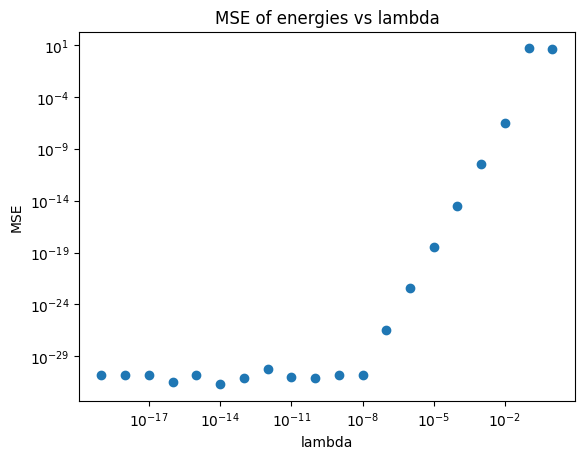

In [56]:
from matplotlib import pyplot as plt 

lambdas =[10**-k for k in range(0,20)]
avg_mses = []
for lam in lambdas:
    H = H0 + lam*H1
    H_evals, H_evecs = np.linalg.eig(H)

    H0_evals, H0_evecs = np.linalg.eig(H0)
    H0_diag = H0_evecs.T@H0@H0_evecs

    PT_matrix_elements = H0_evecs.T @ H0 @ H0_evecs + lam*H0_evecs.T@H1@H0_evecs
    H_evals_PT = np.diag(PT_matrix_elements)

    avg_mse = np.mean((H_evals - H_evals_PT)**2)
    avg_mses.append(avg_mse)

plt.scatter(lambdas, avg_mses)
plt.title("MSE of energies vs lambda")
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.yscale("log")
plt.xscale("log")
plt.show()

We see that when $\lambda$ is small, the perturbation theory energies are a good approximation to the exact energies, but when $\lambda$ is $\mathcal{O}(1)$, the MSE is large. 

This is a good sanity check, but we need to actually show that the corrections are $O(\lambda^2)$ if we did everything right. So let's do one more calculation, and remember to take the sqrt of the MSE for the sake of units.

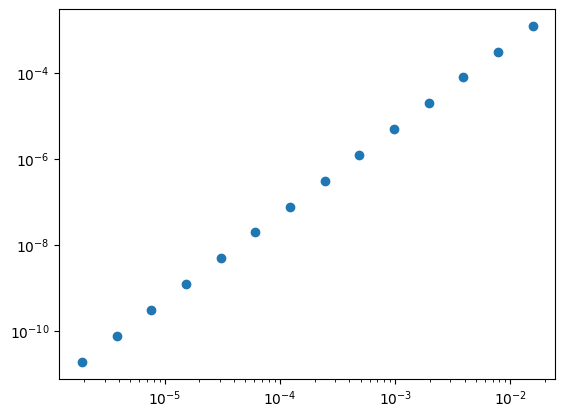

[1.99830287 0.70526451]


In [73]:
from matplotlib import pyplot as plt 

lambdas =[2**-k for k in range(6,20)] # denser lambdas, range chosen to get nice line
avg_sqrtmses = []
for lam in lambdas:
    H = H0 + lam*H1
    H_evals, H_evecs = np.linalg.eig(H)

    H0_evals, H0_evecs = np.linalg.eig(H0)
    H0_diag = H0_evecs.T@H0@H0_evecs

    PT_matrix_elements = H0_evecs.T @ H0 @ H0_evecs + lam*H0_evecs.T@H1@H0_evecs
    H_evals_PT = np.diag(PT_matrix_elements)

    avg_sqrtmse = np.mean(np.sqrt(((H_evals - H_evals_PT)**2)))
    avg_sqrtmses.append(avg_sqrtmse)

plt.scatter(lambdas, avg_sqrtmses)
plt.xscale('log')
plt.yscale('log')
plt.show()

best_fit_line = np.polyfit(np.log10(lambdas), np.log10(avg_sqrtmses), 1)
print(best_fit_line)

## SciPy Special Function

We'll play with SciPy special functions using the simply harmonic oscillator. The wavefunctions are given by Hermite polynomials times Gaussians, which are implemented in `scipy.special.hermite`. Let's plot the first few.

In [ ]:
import math
import scipy

# set default dpi to 50
plt.rcParams['figure.dpi'] = 50

hermite_polys = [scipy.special.hermite(k) for k in range(0,5)]

def SHO_wvfn(x,n):
    unnorm = np.exp(-x**2/2.0) * hermite_polys[n](x)
    return unnorm / np.sqrt(np.sum(unnorm**2))

In [ ]:
x = np.linspace(-5,5,4)
print(x)

[-5.         -1.66666667  1.66666667  5.        ]


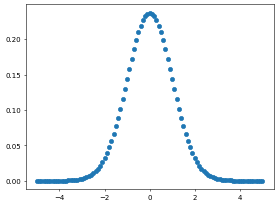

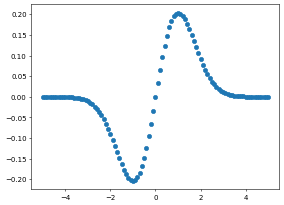

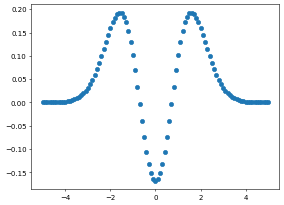

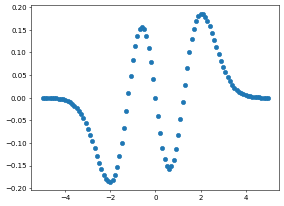

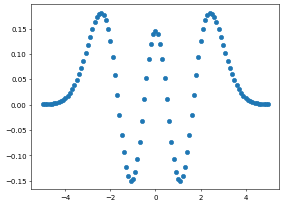

In [ ]:
x = np.linspace(-5,5, 101)

wvfns = [SHO_wvfn(x,n ) for n in range(0,5)]
for y in wvfns:
    plt.scatter(x,y)
    plt.show()



# SymPy

SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python and does not require any external libraries.

Some of the essential things you can do with it are:
- Symbolic algebra
- Calculus
- Solving equations
- Discrete math
- Geometry

Symbolic Algebra Example

In [ ]:
!pip install sympy

In [ ]:
import sympy as sp 

x, y, z = sp.symbols("x y z")
expr = (x+y)**2
print(expr)

(x + y)**2


In [ ]:
expr2 = expr.expand()
print(expr2)

x**2 + 2*x*y + y**2
 2            2
x  + 2⋅x⋅y + y 


In [ ]:
sp.latex(expr)

'\\left(x + y\\right)^{2}'

In [ ]:
expr2.factor()

(x + y)**2

In [ ]:
expr2.diff(x)

2*x + 2*y

In [ ]:
expr2.integrate(x)

x**3/3 + x**2*y + x*y**2

In [ ]:
expr2.diff(x).diff(y)

2

Let's try to solve some equations.

In [ ]:
eqn1 = sp.Eq(x**2+y**2,1) # x^2 + y^2 = 1
eqn2 = sp.Eq(x**2-y**2, 0) # x^2 - y^2 = 0
soln = sp.solve([eqn1,eqn2],[x,y])
print(soln)

[(-sqrt(2)/2, -sqrt(2)/2), (-sqrt(2)/2, sqrt(2)/2), (sqrt(2)/2, -sqrt(2)/2), (sqrt(2)/2, sqrt(2)/2)]


Let's do some discrete math

In [ ]:
import sympy.combinatorics as comb

In [ ]:
G = comb.DihedralGroup(4)

In [ ]:
G.generators

[Permutation(0, 1, 2, 3), Permutation(0, 3)(1, 2)]

Remember that the Dihedral group D(4) is the group of symmetries of a square. What do you think these generators above mean? How can we check this idea?

In [ ]:
rot, flip = G.generators

In [ ]:
rot*rot

Permutation(0, 2)(1, 3)

In [ ]:
rot*rot*rot

Permutation(0, 3, 2, 1)

In [ ]:
rot*rot*rot*rot

Permutation(3)

In [ ]:
rot*rot*rot*rot == G.identity

True

In [ ]:
flip

Permutation(0, 3)(1, 2)

In [ ]:
flip*flip == G.identity

True

We see that the generators rot and flip of the group D(4) satisfy the relations we expect:

$r^4=1, \qquad f^2=1$ 

This is a good sanity check.

In [ ]:
import sympy.geometry as geom

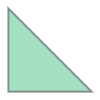

In [ ]:
geom.convex_hull(geom.Point(0,0),geom.Point(1,0),geom.Point(0,1))

Let's check convexity of the hull by putting an interior point inside and making sure it doesn't make it concave

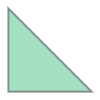

In [ ]:
geom.convex_hull(geom.Point(0,0),geom.Point(1,0),geom.Point(0,1),geom.Point(0.5,0.5))

Same thing! of course it is, because we just added an interior point, which doesn't change the convex hull.

# Summary

Clearly, we are only just scratching the surface of scientific computing in python. There are many more libraries and many more functions in these libraries. The best way to learn is to play around with them and see what you can do.

Methods of this "playing around" include:
- reading the docs to see what is out there
- doing something like ``import sympy.combinators as comb`` and then typing ``comb.<tab>`` to see what is available

But you can also use CoPilot to make suggestions that you can then see if they word. Here's an example, where all the bullets in the list below were auto generated, and the line above it is the prompt I gave.

Packages in python to do group theory include:
- [sympy.combinatorics](https://docs.sympy.org/latest/modules/combinatorics/index.html)
- [sympy.group](https://docs.sympy.org/latest/modules/group/index.html)
- [sympy.algebras](https://docs.sympy.org/latest/modules/algebras/index.html)
- [sympy.liealgebras](https://docs.sympy.org/latest/modules/liealgebras/index.html)

See, even I just learned ``sympy`` has Lie alebgra support! We use this all the time in high energy theory. Let's try it just for fun


In [ ]:
import sympy.liealgebras as lie

In [ ]:
e8 = lie.cartan_type.CartanType("E8")

In [ ]:
e8.dynkin_diagram()

'        2\n        0\n        |\n        |\n0---0---0---0---0---0---0\n1   3   4   5   6   7   8'

In [ ]:
dynk_str = e8.dynkin_diagram()
print(dynk_str)

        2
        0
        |
        |
0---0---0---0---0---0---0
1   3   4   5   6   7   8


Essential libraries within scipy are:
- [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html)
- [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)
- [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)